In [1]:
import numpy as np
import glob
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

# cm inch transfer for matplotlib
def cm2inch(*tupl):
    inch = 2.54
    return tuple(i/inch for i in tupl)

In [2]:
# cases
cases = np.array([4, 8, 10, 20])
linecolor = ['tab:blue', 'tab:red', 'tab:green','k']
linestyle = ['--','-.',':','-']
locs = np.array([[20, 10, 5], [70, 50, 30]])
folderNamePrefix = 'SwBd_Dq56_44M_FLAMELET_LUST_Linear_Sct07_FUEL'

In [3]:
# plot
# figure and axes parameters
# total width is fixed
plot_width      =19.0
margin_left     =1.6
margin_right    =0.1
margin_bottom   =1.2
margin_top      =0.8
space_width     =1.8
space_height    =0.5
ftsize          =11

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=[r'\usepackage{amsmath}',r'\usepackage{bm}'])
# use serif font
plt.rc('font',**font)

ncols = locs.shape[0]
nrows = locs.shape[1]

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(ncols-1)*space_width)/ncols
subplot_height = subplot_width * 0.4

plot_height = (nrows*subplot_height
              +margin_bottom
              +margin_top
              +(nrows-1)*space_height)

(0, 15)

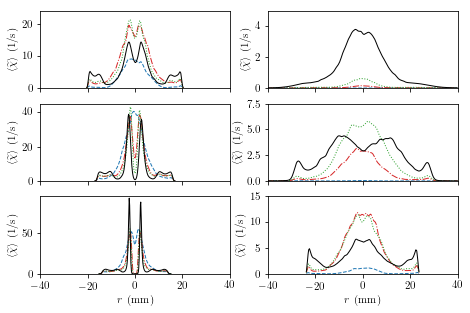

In [12]:
fig, ax = plt.subplots( nrows, ncols, sharex = True,
                        figsize = cm2inch( plot_width, plot_height ) )
for i in range(nrows):
    for j in range(ncols):
        loc = locs[j, i]
        
        for k, case in enumerate(cases):
            filename = '{}{:d}/sample_lines/z{:d}.csv'.format(folderNamePrefix, case, loc)
            data = np.genfromtxt(filename, delimiter=',', names=True)
        
            r = data['Points0']*1000
            v = data['chiMean_average']
            
            ax[i,j].plot(r, v, c=linecolor[k], ls=linestyle[k], lw=1, label='{:d} SLPM'.format(case))
            
        ax[i,j].set_ylabel(r'$\langle\widetilde{\chi}\rangle\;\left(\mathrm{1/s}\right)$')

for j in range(ncols):
    ax[-1,j].set_xlabel(r'$r\;\left(\mathrm{mm}\right)$')
        
ax[0,0].set_xlim([-40,40])

ax[0,0].set_ylim([0,24])
ax[1,0].set_ylim([0,45])
ax[2,0].set_ylim([0,95])
ax[0,1].set_ylim([0,5])
ax[1,1].set_ylim([0,7.5])
ax[2,1].set_ylim([0,15])

In [5]:
fig.savefig('fig_multi_radial_chi.eps')
fig.savefig('fig_multi_radial_chi.pdf')